In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
plt.style.use('default')


plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams["axes.grid"] = True

plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [3]:
import os
os.chdir ('/Users/minseok/Documents/GitHub')

from marcap import marcap_data

In [7]:
#Panel Data : Year 2018
df = marcap_data(start = '2018-01-01',end = '2018-12-31')
len(df)

550675

In [8]:
df.head()

,Code,Name,Close,Changes,ChagesRatio,Volume,Amount,Open,High,Low,Marcap,MarcapRatio,Stocks,ForeignShares,ForeignRatio,Rank
Date,,,,,,,,,,,,,,,,
2018-01-02,005930,삼성전자,2551000.0,3000.0,0.1,169485.0,4.326774e+11,2569000.0,2570000.0,2539000.0,3.293303e+14,17.27,129098494.0,68095088.0,52.75,1.0
2018-01-02,000660,SK하이닉스,76600.0,100.0,0.1,2014838.0,1.546792e+11,77300.0,77300.0,76200.0,5.576498e+13,2.92,728002365.0,346184551.0,47.55,2.0
2018-01-02,005935,삼성전자우,2097000.0,7000.0,0.3,21940.0,4.553242e+10,2096000.0,2097000.0,2058000.0,3.827147e+13,2.01,18250580.0,15021675.0,82.31,3.0
2018-01-02,005380,현대차,149500.0,-6500.0,-4.2,731763.0,1.104238e+11,150500.0,153000.0,149000.0,3.293133e+13,1.73,220276479.0,99484123.0,45.16,4.0
2018-01-02,005490,POSCO,339000.0,6500.0,2.0,153013.0,5.161611e+10,335000.0,341000.0,332500.0,2.955634e+13,1.55,87186835.0,48888696.0,56.07,5.0


In [9]:
#Data processing - drop irrelevant columns, reset index to hierarchical
df_1 = df.drop(['Name','Rank'],axis=1).reset_index().set_index(['Code','Date']).sort_index()

In [10]:
#For single code, over partial period 
def generate_input_single (code):
    temp = df_1.loc[code,:]
    df1 = pd.DataFrame(temp.index.unique()[19:-7])
    
    # 3/4 for training, 1/4 for validation
    test_len = int(len(df1) * (3/4))
    
    print ("Train_no: {} and Test_no: {}".format(test_len,len(df1)-test_len))
    
    #Train data
    temp_train_data = np.empty((0,20,13), float)
    temp_train_target = np.empty((0,6), float)
    
    for i in range (0, test_len):
        temp_train_data = np.append(temp_train_data, temp[i:i+20].values.reshape(1,20,13), axis=0)
        temp_train_target = np.append(temp_train_target, temp [i+20:i+26]['Close'].values.reshape(1,6), axis = 0)
    
    #Test data
    temp_test_data = np.empty((0,20,13), float)
    temp_test_target = np.empty((0,6), float)
    
    for i in range (test_len, len(df1)):
        temp_test_data = np.append(temp_test_data, temp[i:i+20].values.reshape(1,20,13), axis=0)
        temp_test_target = np.append(temp_test_target, temp [i+20:i+26]['Close'].values.reshape(1,6), axis = 0)
    
    return temp_train_data, temp_train_target, temp_test_data, temp_test_target

In [11]:
train_data = np.empty((0,20,13), float)
train_target = np.empty((0,6), float)
test_data = np.empty((0,20,13), float)
test_target = np.empty((0,6), float)

In [12]:
#Single
train_data, train_target, test_data, test_target = generate_input_single ('004310')

Train_no: 163 and Test_no: 55


In [13]:
print (train_data.shape)
print (train_target.shape)

(163, 20, 13)
(163, 6)


In [14]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.LSTM(32, input_shape=(20,13), return_sequences=True))

model.add(keras.layers.LSTM(16, activation = 'relu'))
    
model.add(keras.layers.Dense(6))

#complile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [15]:
history = model.fit(train_data,train_target, epochs=100, verbose=1)

Epoch 1/100
163/163 [==============================] - 4s 23ms/step - loss: 5849.1642
Epoch 2/100
163/163 [==============================] - 1s 7ms/step - loss: 5848.6166
Epoch 3/100
163/163 [==============================] - 1s 4ms/step - loss: 5833.2282
Epoch 4/100
163/163 [==============================] - 1s 4ms/step - loss: 5719.6523
Epoch 5/100
163/163 [==============================] - 1s 3ms/step - loss: 5438.4481
Epoch 6/100
163/163 [==============================] - 1s 3ms/step - loss: 4776.7011
Epoch 7/100
163/163 [==============================] - 1s 3ms/step - loss: 2886.4077
Epoch 8/100
163/163 [==============================] - 0s 3ms/step - loss: 2308.8866
Epoch 9/100
163/163 [==============================] - 0s 3ms/step - loss: 2278.8282
Epoch 10/100
163/163 [==============================] - 1s 4ms/step - loss: 1838.6583
Epoch 11/100
163/163 [==============================] - 1s 3ms/step - loss: 1610.6146
Epoch 12/100
163/163 [==============================] - 1s 3ms

Epoch 97/100
163/163 [==============================] - 0s 3ms/step - loss: 772.7810
Epoch 98/100
163/163 [==============================] - 1s 3ms/step - loss: 831.0395
Epoch 99/100
163/163 [==============================] - 1s 3ms/step - loss: 1025.7097
Epoch 100/100
163/163 [==============================] - 0s 3ms/step - loss: 639.2015


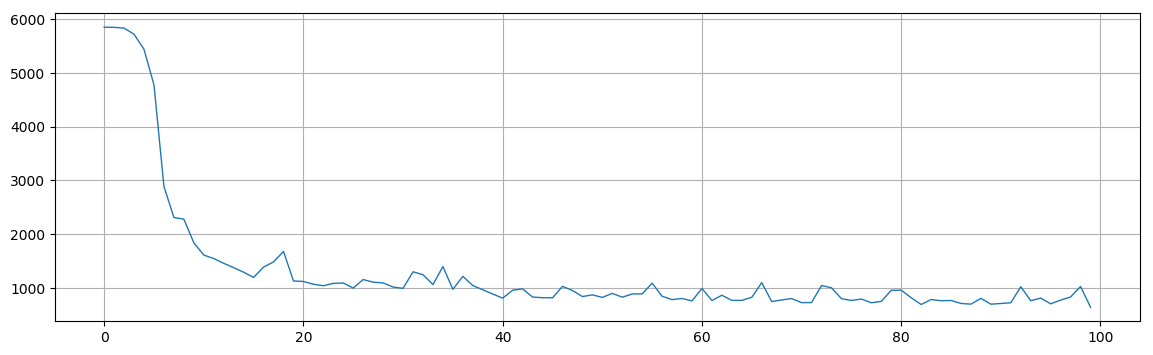

In [16]:
plt.plot(history.history['loss'])

In [18]:
def create_time_steps(length):
  return list(range(-length, 0))

def make_prediction (code, i):
    temp = df_1.loc[code,:]
    df1 = pd.DataFrame(temp.index.unique()[19:-7])
    
    pred_data = temp[i:i+20].values.reshape(1,20,13)
    pred_result = model.predict(pred_data)
    
    actual_result = temp[i+20:i+26]['Close'].values.reshape(1,6)
    
    plt.figure(figsize=(12, 6))
    
    num_in = create_time_steps(20)
    num_out = 6
    
    plt.plot(num_in, np.array(pred_data.reshape(20,13)[:,0]), label='History')
    
    plt.plot(np.arange(num_out), np.array(actual_result).reshape(6), 'bo',
           label='True Future')
    
    plt.plot(np.arange(num_out), np.array(pred_result).reshape(6), 'ro',
             label='Predicted Future')
    
    plt.legend(loc='upper left')
    plt.show()

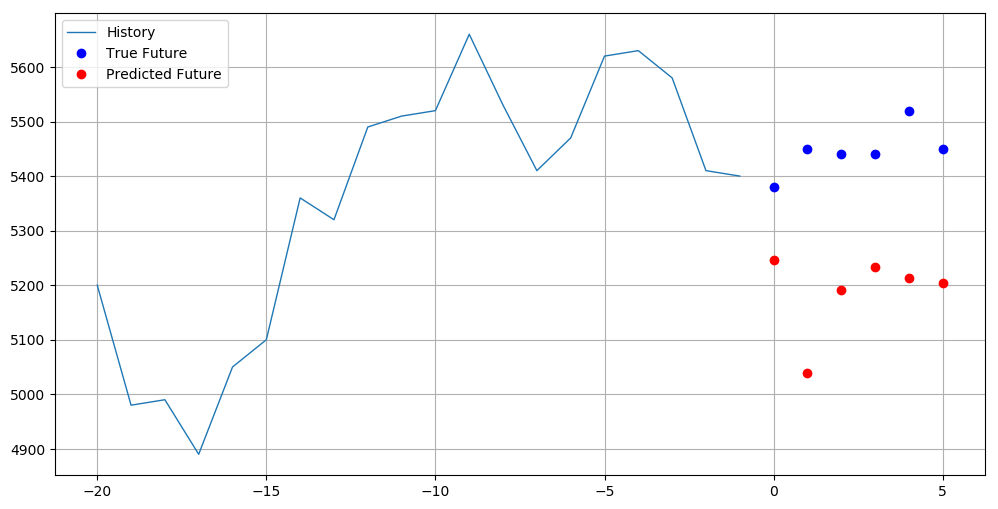

In [19]:
make_prediction('004310',150)